In [1]:
import pandas as pd

file_path = "./raw_dataset/fullarticles_cleaned.csv"
df = pd.read_csv(file_path, low_memory=False)

# quick checks
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1635 entries, 0 to 1634
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   title          48 non-null     object
 1   title_en       192 non-null    object
 2   general_field  1446 non-null   object
 3   authors        206 non-null    object
 4   source         1635 non-null   object
 5   path           1635 non-null   object
dtypes: object(6)
memory usage: 76.8+ KB


In [2]:
df.head(10)

,title,title_en,general_field,authors,source,path
0,درجة اكتساب طلبة كلية التربية بجامعة السلطان ق...,The Level of Acquisition of Action Research Sk...,NaN,"[""نور النجار""]",AJP,finalpdfs/AJP_1337_1.pdf
1,القيادة الاستباقية وعلاقتها بإدارة مخاطر البيئ...,Proactive Leadership and its Relationship to S...,NaN,"[""لانا عبد المولى العنزي"", ""محمد عبود الحراحشة""]",AJP,finalpdfs/AJP_1338_2.pdf
2,درجة ممارسة معلمي اللغة العربية لمهارات التذوق...,The Degree to Which Arabic Language Teachers P...,NaN,"[""أمل مد الله الشعراء""]",AJP,finalpdfs/AJP_1339_3.pdf
3,تحليل محتوى منهاج الرياضيات للصف الثامن من مرح...,Analysis of the content of the mathematics cur...,NaN,"[""ريتا سعيد""]",AJP,finalpdfs/AJP_1340_4.pdf
4,تصميم تعليمي وفق التعلم الخبراتي وأثره في التح...,Educational design based on experiential learn...,NaN,"[""سلوى محسن العامري""]",AJP,finalpdfs/AJP_1341_5.pdf


In [5]:
# get unique values for 'general_field' (excluding NaN) and show counts
if 'general_field' not in df.columns:
    print("Column 'general_field' not found in dataframe.")
else:
    uniq = pd.Series(df['general_field'].unique()).sort_values().tolist()
    print(f"Unique general_field count: {len(uniq)}")
    print(uniq)
    print("\nValue counts:")
    print(df['general_field'].value_counts())

Unique general_field count: 8
['Agricultural', 'Arabic', 'Art', 'Bus', 'Business', 'Edu', 'Education', nan]

Value counts:
general_field
Agricultural    307
Education       301
Business        296
Art             286
Arabic          241
Edu              13
Bus               2
Name: count, dtype: int64


In [61]:
# normalize general_field values
if 'general_field' in df.columns:
    df['general_field'] = df['general_field'].replace({'Bus': 'Business', 'Edu': 'Education'})
    # recompute uniq list
    uniq = sorted(df['general_field'].dropna().unique().tolist())
    print("Updated unique general_field values (non-null):", len(uniq))
    print(uniq)
    print("\nValue counts after replacement:")
    print(df['general_field'].value_counts(dropna=True))
else:
    print("Column 'general_field' not found in dataframe.")

Updated unique general_field values (non-null): 5
['Agricultural', 'Arabic', 'Art', 'Business', 'Education']

Value counts after replacement:
general_field
Education       314
Agricultural    307
Business        298
Art             286
Arabic          241
Name: count, dtype: int64


In [40]:
print(type(df['authors'][1]))

<class 'str'>


In [47]:
df['authors'] = df['authors'].astype(str).str.replace('', ',')
print(df['authors'].head())

0                                      ["نور النجار"]
1    ["لانا عبد المولى العنزي", "محمد عبود الحراحشة"]
2                             ["أمل مد الله الشعراء"]
3                                       ["ريتا سعيد"]
4                               ["سلوى محسن العامري"]
Name: authors, dtype: object


In [48]:
df.to_csv('experiment.csv',index=False)

In [49]:
import ast

def normalize_authors(auth):
    if pd.isna(auth):
        return []
    # Try to parse as a list if it's a string representation of a list
    if isinstance(auth, str):
        try:
            parsed = ast.literal_eval(auth)
            if isinstance(parsed, list):
                return [str(a).strip() for a in parsed if a]
        except (ValueError, SyntaxError):
            # If not a list, split by comma
            return [a.strip() for a in auth.split(',') if a.strip()]
    elif isinstance(auth, list):
        return [str(a).strip() for a in auth if a]
    return [str(auth).strip()]

df['authors'] = df['authors'].apply(normalize_authors)
print(df['authors'].head())

0                                    [نور النجار]
1    [لانا عبد المولى العنزي, محمد عبود الحراحشة]
2                           [أمل مد الله الشعراء]
3                                     [ريتا سعيد]
4                             [سلوى محسن العامري]
Name: authors, dtype: object


In [50]:
df['id'] = df.index + 1
print(df[['id', 'title']].head())

   id                                              title
0   1  درجة اكتساب طلبة كلية التربية بجامعة السلطان ق...
1   2  القيادة الاستباقية وعلاقتها بإدارة مخاطر البيئ...
2   3  درجة ممارسة معلمي اللغة العربية لمهارات التذوق...
3   4  تحليل محتوى منهاج الرياضيات للصف الثامن من مرح...
4   5  تصميم تعليمي وفق التعلم الخبراتي وأثره في التح...


In [51]:
# Remove surrounding quotes and ensure each authors list is separated by commas
def clean_author_names(auth_list):
    # Remove surrounding quotes and strip whitespace
    cleaned = [a.strip().strip('"').strip("'") for a in auth_list if a and a.strip()]
    # Join authors with comma
    return ', '.join(cleaned)

df['authors'] = df['authors'].apply(clean_author_names)
print(df['authors'].head())

0                                    نور النجار
1    لانا عبد المولى العنزي, محمد عبود الحراحشة
2                           أمل مد الله الشعراء
3                                     ريتا سعيد
4                             سلوى محسن العامري
Name: authors, dtype: object


In [52]:
df.to_csv('experiment1.csv',index=False)

In [53]:

df = pd.read_csv('experiment1.csv')
df.head()

,title,title_en,general_field,authors,source,path,id
0,درجة اكتساب طلبة كلية التربية بجامعة السلطان ق...,The Level of Acquisition of Action Research Sk...,NaN,نور النجار,AJP,finalpdfs/AJP_1337_1.pdf,1
1,القيادة الاستباقية وعلاقتها بإدارة مخاطر البيئ...,Proactive Leadership and its Relationship to S...,NaN,"لانا عبد المولى العنزي, محمد عبود الحراحشة",AJP,finalpdfs/AJP_1338_2.pdf,2
2,درجة ممارسة معلمي اللغة العربية لمهارات التذوق...,The Degree to Which Arabic Language Teachers P...,NaN,أمل مد الله الشعراء,AJP,finalpdfs/AJP_1339_3.pdf,3
3,تحليل محتوى منهاج الرياضيات للصف الثامن من مرح...,Analysis of the content of the mathematics cur...,NaN,ريتا سعيد,AJP,finalpdfs/AJP_1340_4.pdf,4
4,تصميم تعليمي وفق التعلم الخبراتي وأثره في التح...,Educational design based on experiential learn...,NaN,سلوى محسن العامري,AJP,finalpdfs/AJP_1341_5.pdf,5


In [56]:
# Collect unique authors and associate each with their article IDs and article count, then save to authors.csv
author_articles = {}

for idx, authors in df[['id', 'authors']].dropna(subset=['authors']).iterrows():
    article_id = authors['id']
    authors_field = authors['authors']
    items = authors_field if isinstance(authors_field, (list, tuple)) else [authors_field]
    for item in items:
        if not item:
            continue
        for name in str(item).replace('\xa0', ' ').split(','):
            name = name.strip()
            if name:
                if name not in author_articles:
                    author_articles[name] = []
                author_articles[name].append(article_id)

# Prepare dataframe
authors_df = pd.DataFrame({
    'author': sorted(author_articles.keys()),
    'article_ids': [author_articles[name] for name in sorted(author_articles.keys())],
    'article_count': [len(author_articles[name]) for name in sorted(author_articles.keys())]
})

authors_df.to_csv('authors.csv', index=False)
print(f"Saved {len(authors_df)} unique authors with article IDs and counts to authors.csv")

Saved 315 unique authors with article IDs and counts to authors.csv


In [54]:
article_row = df[df['id'] == 127]
print(article_row)

    title                                        title_en general_field  \
126   NaN  The Unspoken in the Speech of Symbolism School           NaN   

                                               authors source  \
126  Basheer Thabit Mohammed, Lateef Mahmoud Mohamm...  ajsrp   

                        path   id  
126  finalpdfs/4554-4307.pdf  127  


In [63]:
df.to_csv('cleaned1.csv', index=False)

In [7]:
# Reload authors.csv into authors_df
authors_df = pd.read_csv('authors.csv')
cleaned1= pd.read_csv('cleaned.csv')


In [11]:
authors_df.info()
cleaned1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 315 entries, 0 to 314
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   author         315 non-null    object
 1   article_ids    315 non-null    object
 2   article_count  315 non-null    int64 
dtypes: int64(1), object(2)
memory usage: 7.5+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1635 entries, 0 to 1634
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   title          48 non-null     object
 1   title_en       192 non-null    object
 2   general_field  1446 non-null   object
 3   authors        206 non-null    object
 4   source         1635 non-null   object
 5   path           1635 non-null   object
 6   id             1635 non-null   int64 
dtypes: int64(1), object(6)
memory usage: 89.5+ KB


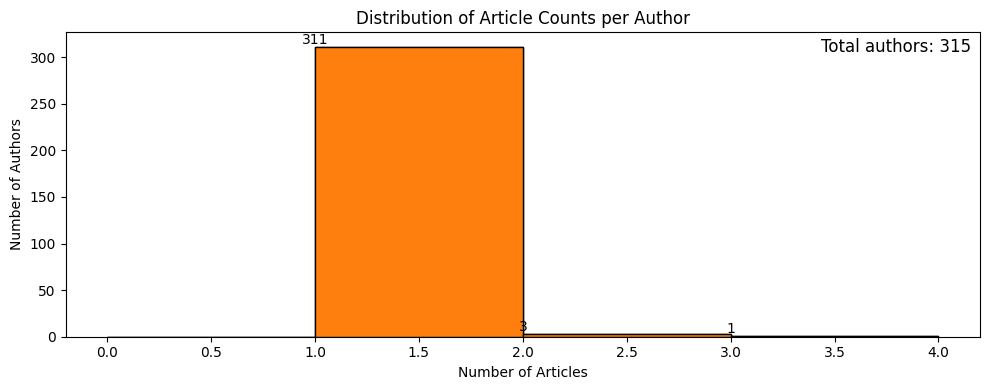

In [8]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 4))
plt.hist(authors_df['article_count'], bins=range(0, authors_df['article_count'].max()+2), edgecolor='black')
plt.title('Distribution of Article Counts per Author')
plt.xlabel('Number of Articles')
plt.ylabel('Number of Authors')
# Annotate each bar with its corresponding count
counts, bins, patches = plt.hist(authors_df['article_count'], bins=range(0, authors_df['article_count'].max()+2), edgecolor='black')
for bin_left, count in zip(bins[:-1], counts):
    if count > 0:
        plt.text(bin_left + 0.5, count, str(int(count)), ha='center', va='bottom', fontsize=10, color='black')

# Show total count on top
total_authors = len(authors_df)
plt.text(0.99, 0.98, f'Total authors: {total_authors}', ha='right', va='top', transform=plt.gca().transAxes, fontsize=12, bbox=dict(facecolor='white', alpha=0.7, edgecolor='none'))
plt.savefig('./figs/author_article_count_distribution.png')

plt.tight_layout()
plt.show()

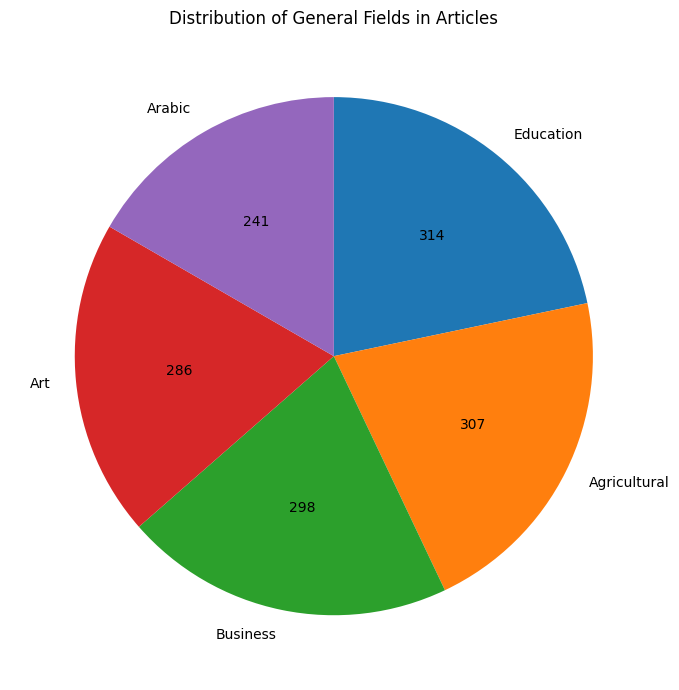

In [76]:
# Pie plot for general_field distribution in cleaned1
general_field_counts = cleaned1['general_field'].value_counts(dropna=True)
plt.figure(figsize=(7, 7))
# Use a lambda function to display absolute numbers instead of percentages
autopct_lambda = lambda pct: f'{int(round(pct/100.*general_field_counts.sum()))}'
general_field_counts.plot.pie(autopct=autopct_lambda, startangle=90, counterclock=False)
plt.ylabel('')
plt.title('Distribution of General Fields in Articles')
plt.savefig('./figs/general_field_distribution.png')
plt.tight_layout()
plt.show()